<a href="https://colab.research.google.com/github/eliudgarza/eliudgarza/blob/main/Implementacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eliud Garza A00827575

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

!pwd

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/7mo Semestre/Modulo 2"

!ls

/content/gdrive/MyDrive/7mo Semestre/Modulo 2
 brain_stroke.csv     'Momento de Retro: Modulo 2'   PlayDataset.csv
 mc-donalds-menu.csv  'Neural Network.ipynb'	     Valhalla23.csv


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno 
from sklearn.model_selection import train_test_split


In [ ]:
dset = pd.read_csv("brain_stroke.csv")

dset.head(5000)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


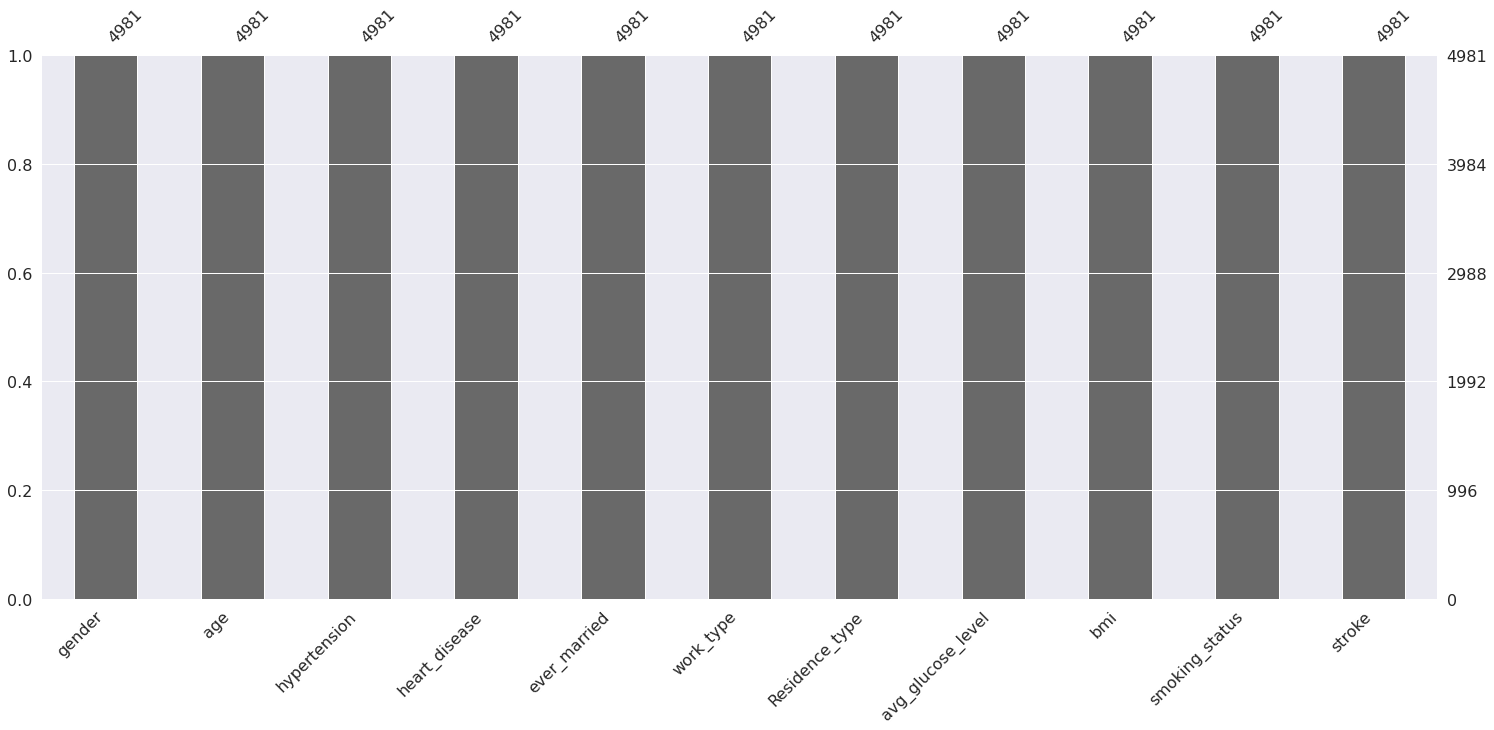

In [ ]:
msno.bar(dset)

In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
dset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


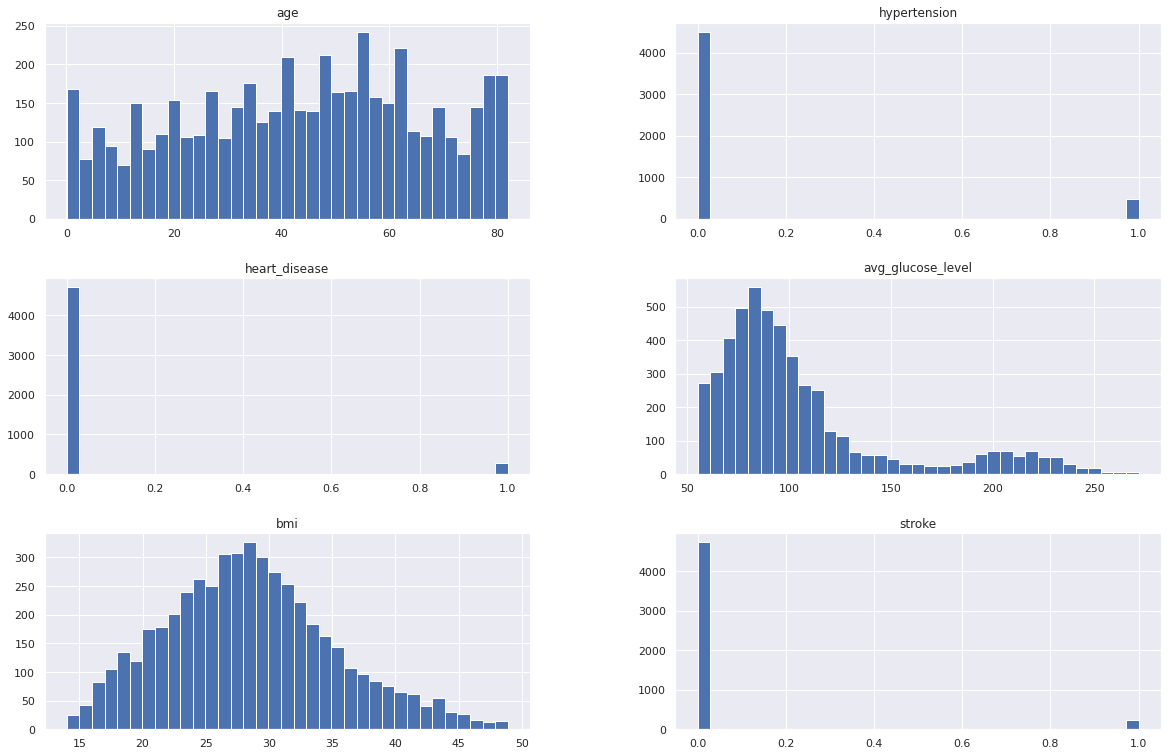

In [ ]:
dset.hist(bins=35, figsize=(20,13))
plt.show()

In [ ]:
cor = dset.corr()
cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


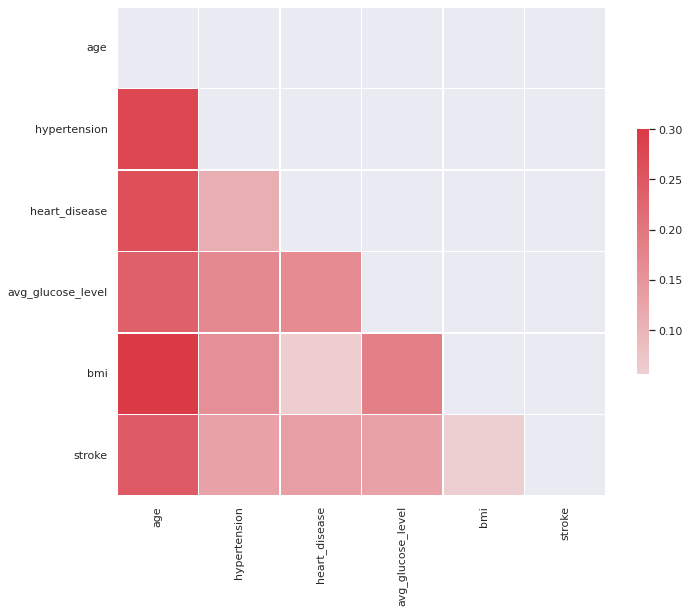

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
clean_cat = {"gender": {"Male":0, "Female": 1}, "ever_married": {"No":0,"Yes":1}, "work_type": {"Private":0, "Govt_job":1, "Self-employed":2, "children":3, "Neverworked":4}, "Residence_type": {"Rural":0, "Urban":1}, "smoking_status": {"never smoked":0, "Unknown":1,"formerly smoked":2, "smokes":3}}

dset = dset.replace(clean_cat)

dset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,2,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,2,1


In [ ]:
X = dset.drop(["stroke"], axis = 1)
Y = dset["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import SCORERS
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
decisionTree.fit(X_train, y_train)
Y_pred = decisionTree.predict(X_test)
score = round(decisionTree.score(X_train, y_train) * 100, 2)
print('Decision Tree Classifier predicts with', score, '% of accuracy')

Decision Tree Classifier predicts with 95.15 % of accuracy
